In [1]:
# ---- Bibliotecas ----
import warnings
warnings.filterwarnings("ignore")
import numpy as np
import pandas as pd
from tabulate import tabulate
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from scipy.stats import shapiro, kstest, anderson, normaltest
from scipy.stats import bernoulli, chisquare, alpha, anglit, arcsine, argus, beta, betaprime, bradford, burr, burr12, cauchy, chi, chi2, cosine, crystalball, dgamma, dweibull, erlang, expon, exponnorm, exponweib, f, fatiguelife, fisk, foldcauchy, foldnorm, genlogistic, gennorm, genpareto, genexpon, genextreme, gausshyper, gamma, gengamma, genhalflogistic, genhyperbolic, geninvgauss, gompertz, gumbel_r, gumbel_l, halfcauchy, halflogistic, halfnorm, hypsecant, invgamma, invgauss, invweibull, johnsonsb, johnsonsu, kappa4, kappa3, ksone, kstwobign, laplace, logistic, loggamma, loglaplace, lognorm, loguniform, lomax, maxwell, mielke, moyal, nakagami, ncx2, ncf, nct, norm, norminvgauss, pareto, pearson3, powerlaw, powerlognorm, powernorm, rdist, rayleigh, recipinvgauss, semicircular, skewcauchy, skewnorm, t, trapezoid, triang, truncexpon, truncnorm, truncpareto, truncweibull_min, tukeylambda, uniform, vonmises, vonmises_line, wald, weibull_min, weibull_max, wrapcauchy
from mpl_toolkits.mplot3d import Axes3D
import unicodedata
import plotly.express as px

In [25]:
# --- 1. Ler o arquivo CSV 2024 ---
# names = [N_casos, nº de casos; SEX, sexo; RA, raça; EP,  exp. percutanea; EM, exp. mucosa; EPi, exp. pele integra; EPni, exp. pele não integra; EXO, exp. outros; MO, Material organico; FE, faixa etaria; ZR, zona de residencia; CAT , emissão de CAT]

# substitua pelo nome correto do seu arquivo .csv
dados = pd.read_csv("bio-security.csv", decimal=",", encoding="utf-8")
#dados = dados.applymap(lambda x: str(x).replace(",", ".") if isinstance(x, str) else x)

# Visualizar as primeiras 5 linhas
print(tabulate(dados.head(), headers='keys', tablefmt='pretty'))

+---+------+-----------+---------+-----------+----------+---------+---------+-----------+----------+------------+----------+-------------+--------+--------+--------+--------+--------+--------+---------+---------+---------+-----------+----------+----------+---------+---------+---------+--------+-----------+-----------+-------------------+------------------+------------------+------------------+----------------+-----------+------------+----------+-----------+------------+------------+------------+------------+------------+--------+--------+-----------+----------+---------------+---------+---------+---------+--------------+
|   | ano  |    mes    | N_casos | SEX_indef | SEX_masc | SEX_fem | RA_ndec | RA_branco | RA_negro | RA_amarelo | RA_pardo | RA_indigena | EP_ign | EP_sim | EP_nao | EM_ign | EM_sim | EM_nao | EPi_ign | EPi_sim | EPi_nao | EPni__ign | EPni_sim | EPni_nao | EXO_ign | EXO_sim | EXO_nao | MO_ign | MO_sangue | MO_liquor | MO_liquor_pleural | MO_liquor_ascite | MO_liq_amnio

In [3]:
# --- 2. Shape da tabela (número de linhas e colunas) ---
print("Número de amostras (linhas, colunas):")
print(dados.shape)

Número de amostras (linhas, colunas):
(60, 53)


In [4]:
print(dados.columns)

Index(['ano', 'mes', 'N_casos', 'SEX_indef', 'SEX_masc', 'SEX_fem', 'RA_ndec',
       'RA_branco', 'RA_negro', 'RA_amarelo', 'RA_pardo', 'RA_indigena',
       'EP_ign', 'EP_sim', 'EP_nao', 'EM_ign', 'EM_sim', 'EM_nao', 'EPi_ign',
       'EPi_sim', 'EPi_nao', 'EPni__ign', 'EPni_sim', 'EPni_nao', 'EXO_ign',
       'EXO_sim', 'EXO_nao', 'MO_ign', 'MO_sangue', 'MO_liquor',
       'MO_liquor_pleural', 'MO_liquor_ascite', 'MO_liq_amniotico',
       'MO_fluido_sangue', 'MO_soro_plasma', 'MO_outros', 'FE_< 1 ano',
       'FE_1_a_4', 'FE_5_a_14', 'FE_15_a_24', 'FE_25_a_34', 'FE_35_a_44',
       'FE_45_a_54', 'FE_55_a_64', 'FE_65+', 'ZR_ign', 'ZR_urbana', 'ZR_rural',
       'ZR_periurbana', 'CAT_ign', 'CAT_sim', 'CAT_nao', 'CAT_n_aplica'],
      dtype='object')


In [5]:
# --- 3. Estatísticas descritivas ---
# Encontrar o índice do valor mínimo e máximo
min_idx = dados["N_casos"].idxmin()
max_idx = dados["N_casos"].idxmax()

# Mostrar mês e ano correspondentes
min_info = dados.loc[min_idx, ["ano", "mes", "N_casos"]]
max_info = dados.loc[max_idx, ["ano", "mes", "N_casos"]]

print("\n Valor Mínimo:")
print(min_info)

print("\n Valor Máximo:")
print(max_info)

dados = dados.drop(columns=["ano", "mes"], errors='ignore')
print("\n 📊 Estatísticas básicas do dataset:")

print(tabulate(dados.describe().round(2), headers='keys', tablefmt='pretty'))


 Valor Mínimo:
ano         2020
mes        abril
N_casos      559
Name: 51, dtype: object

 Valor Máximo:
ano         2020
mes        julho
N_casos     1643
Name: 54, dtype: object

 📊 Estatísticas básicas do dataset:
+-------+---------+-----------+----------+---------+---------+-----------+----------+------------+----------+-------------+--------+--------+--------+--------+--------+--------+---------+---------+---------+-----------+----------+----------+---------+---------+---------+--------+-----------+-----------+-------------------+------------------+------------------+------------------+----------------+-----------+------------+----------+-----------+------------+------------+------------+------------+------------+--------+--------+-----------+----------+---------------+---------+---------+---------+--------------+
|       | N_casos | SEX_indef | SEX_masc | SEX_fem | RA_ndec | RA_branco | RA_negro | RA_amarelo | RA_pardo | RA_indigena | EP_ign | EP_sim | EP_nao | EM_ign | EM_sim 

In [11]:
# --- 4. Percentuais ---
# --- Total de casos ---
total_casos = {
    "Total de casos (2020 - 2024)": dados["N_casos"].sum()
}

# Transformar em DataFrame para plot
total_casos = pd.DataFrame(list(total_casos.items()), columns=[" ", "Acidentes"])

print(tabulate(total_casos.round(2), headers='keys', tablefmt='pretty'))

+---+------------------------------+-----------+
|   |                              | Acidentes |
+---+------------------------------+-----------+
| 0 | Total de casos (2020 - 2024) |   57386   |
+---+------------------------------+-----------+


In [ ]:
# --- Por Sexo ---
total_sexo = {
    "Indefinido": dados["SEX_indef"].sum(),
    "Masculino": dados["SEX_masc"].sum(),
    "Feminino": dados["SEX_fem"].sum()
}

# Transformar em DataFrame para plot
por_sexo = pd.DataFrame(list(total_sexo.items()), columns=["Sexo", "Acidentes"])

# Calcula percentual
por_sexo["Percentual"] = (por_sexo["Acidentes"] / por_sexo["Acidentes"].sum()) * 100

print(tabulate(por_sexo.round(2), headers='keys', tablefmt='pretty'))

+---+------------+-----------+------------+
|   |    Sexo    | Acidentes | Percentual |
+---+------------+-----------+------------+
| 0 | Indefinido |     6     |    0.01    |
| 1 | Masculino  |   13952   |    24.3    |
| 2 |  Feminino  |   43458   |   75.69    |
+---+------------+-----------+------------+


In [ ]:
# --- Por Raça ---
total_raca = {
    "Indefinido": dados["RA_ndec"].sum(),
    "Branco": dados["RA_branco"].sum(),
    "Negro": dados["RA_negro"].sum(),
    "Amarelo": dados["RA_amarelo"].sum(),
    "Pardo": dados["RA_pardo"].sum(),
    "Indigena": dados["RA_indigena"].sum()
}

# Transformar em DataFrame para plot
total_raca = pd.DataFrame(list(total_raca.items()), columns=["Raça", "Acidentes"])

# Calcula percentual
total_raca["Percentual"] = (total_raca["Acidentes"] / total_raca["Acidentes"].sum()) * 100

print(tabulate(total_raca.round(2), headers='keys', tablefmt='pretty'))

+---+------------+-----------+------------+
|   |    Raça    | Acidentes | Percentual |
+---+------------+-----------+------------+
| 0 | Indefinido |   2507    |    4.37    |
| 1 |   Branco   |   25668   |   44.73    |
| 2 |   Negro    |   5130    |    8.94    |
| 3 |  Amarelo   |    415    |    0.72    |
| 4 |   Pardo    |   23583   |    41.1    |
| 5 |  Indigena  |    83     |    0.14    |
+---+------------+-----------+------------+


In [21]:
# --- Por Exposição ---
# --- Exposição Percutanea --- 
total_EP = {
    "Ignorado": dados["EP_ign"].sum(),
    "Sim": dados["EP_sim"].sum(),
    "Não": dados["EP_nao"].sum(),
}

# Transformar em DataFrame para plot
total_EP = pd.DataFrame(list(total_EP.items()), columns=["Expo. Percutanea", "Acidentes"])

# Calcula percentual
total_EP["Percentual"] = (total_EP["Acidentes"] / total_EP["Acidentes"].sum()) * 100

print(tabulate(total_EP.round(2), headers='keys', tablefmt='pretty'))

+---+------------------+-----------+------------+
|   | Expo. Percutanea | Acidentes | Percentual |
+---+------------------+-----------+------------+
| 0 |     Ignorado     |   5332    |    9.29    |
| 1 |       Sim        |   30268   |   52.76    |
| 2 |       Não        |   21766   |   37.94    |
+---+------------------+-----------+------------+


In [22]:
# --- Exposição de Mucosa --- 
total_EM = {
    "Ignorado": dados["EM_ign"].sum(),
    "Sim": dados["EM_sim"].sum(),
    "Não": dados["EM_nao"].sum(),
}

# Transformar em DataFrame para plot
total_EM = pd.DataFrame(list(total_EM.items()), columns=["Expo. de Mucosa", "Acidentes"])

# Calcula percentual
total_EM["Percentual"] = (total_EM["Acidentes"] / total_EM["Acidentes"].sum()) * 100

print(tabulate(total_EM.round(2), headers='keys', tablefmt='pretty'))

+---+-----------------+-----------+------------+
|   | Expo. de Mucosa | Acidentes | Percentual |
+---+-----------------+-----------+------------+
| 0 |    Ignorado     |   10337   |   18.01    |
| 1 |       Sim       |   8827    |   15.38    |
| 2 |       Não       |   38222   |   66.61    |
+---+-----------------+-----------+------------+


In [23]:
# --- Exposição de Pele integra --- 
total_EPi = {
    "Ignorado": dados["EPi_ign"].sum(),
    "Sim": dados["EPi_sim"].sum(),
    "Não": dados["EPi_nao"].sum(),
}

# Transformar em DataFrame para plot
total_EPi = pd.DataFrame(list(total_EPi.items()), columns=["Expo. de Pele Integra", "Acidentes"])

# Calcula percentual
total_EPi["Percentual"] = (total_EPi["Acidentes"] / total_EPi["Acidentes"].sum()) * 100

print(tabulate(total_EPi.round(2), headers='keys', tablefmt='pretty'))

+---+-----------------------+-----------+------------+
|   | Expo. de Pele Integra | Acidentes | Percentual |
+---+-----------------------+-----------+------------+
| 0 |       Ignorado        |   9777    |   17.04    |
| 1 |          Sim          |   18023   |   31.41    |
| 2 |          Não          |   29577   |   51.55    |
+---+-----------------------+-----------+------------+


In [27]:
# --- Exposição de Pele ñ integra --- 
total_EPni = {
    "Ignorado": dados["EPni__ign"].sum(),
    "Sim": dados["EPni_sim"].sum(),
    "Não": dados["EPni_nao"].sum(),
}

# Transformar em DataFrame para plot
total_EPni = pd.DataFrame(list(total_EPni.items()), columns=["Expo. de Pele Ñ Integra", "Acidentes"])

# Calcula percentual
total_EPni["Percentual"] = (total_EPni["Acidentes"] / total_EPni["Acidentes"].sum()) * 100

print(tabulate(total_EPni.round(2), headers='keys', tablefmt='pretty'))

+---+-------------------------+-----------+------------+
|   | Expo. de Pele Ñ Integra | Acidentes | Percentual |
+---+-------------------------+-----------+------------+
| 0 |        Ignorado         |   11560   |   20.13    |
| 1 |           Sim           |   2849    |    4.96    |
| 2 |           Não           |   43004   |    74.9    |
+---+-------------------------+-----------+------------+


In [28]:
# --- Exposição de Outros --- 
total_EXO = {
    "Ignorado": dados["EXO_ign"].sum(),
    "Sim": dados["EXO_sim"].sum(),
    "Não": dados["EXO_nao"].sum(),
}

# Transformar em DataFrame para plot
total_EXO = pd.DataFrame(list(total_EXO.items()), columns=["Expo. Outras partes", "Acidentes"])

# Calcula percentual
total_EXO["Percentual"] = (total_EXO["Acidentes"] / total_EPni["Acidentes"].sum()) * 100

print(tabulate(total_EXO.round(2), headers='keys', tablefmt='pretty'))

+---+---------------------+-----------+------------+
|   | Expo. Outras partes | Acidentes | Percentual |
+---+---------------------+-----------+------------+
| 0 |      Ignorado       |   14051   |   24.47    |
| 1 |         Sim         |   9209    |   16.04    |
| 2 |         Não         |   34028   |   59.27    |
+---+---------------------+-----------+------------+


In [30]:
# --- Materia Organica --- 
total_MO = {
    "Sangue": dados["MO_ign"].sum(),
    "Liquor": dados["MO_sangue"].sum(),
    "Liquor Pleural": dados["MO_liquor_pleural"].sum(),
    "Liquor Ascite": dados["MO_liquor_ascite"].sum(),
    "Liq. Amniotico": dados["MO_liq_amniotico"].sum(),
    "Fluido de Sangue": dados["MO_fluido_sangue"].sum(),
    "Soro/Plasma": dados["MO_soro_plasma"].sum(),
    "Outros": dados["MO_outros"].sum()
}

# Transformar em DataFrame para plot
total_MO = pd.DataFrame(list(total_MO.items()), columns=["Matérial Orgânico", "Acidentes"])

# Calcula percentual
total_MO["Percentual"] = (total_MO["Acidentes"] / total_MO["Acidentes"].sum()) * 100

print(tabulate(total_MO.round(2), headers='keys', tablefmt='pretty'))

+---+-------------------+-----------+------------+
|   | Matérial Orgânico | Acidentes | Percentual |
+---+-------------------+-----------+------------+
| 0 |      Sangue       |   5109    |    8.94    |
| 1 |      Liquor       |   31923   |   55.87    |
| 2 |  Liquor Pleural   |    93     |    0.16    |
| 3 |   Liquor Ascite   |    36     |    0.06    |
| 4 |  Liq. Amniotico   |    78     |    0.14    |
| 5 | Fluido de Sangue  |   1840    |    3.22    |
| 6 |    Soro/Plasma    |    164    |    0.29    |
| 7 |      Outros       |   17897   |   31.32    |
+---+-------------------+-----------+------------+


In [33]:
# --- Faixa Etária ---
total_FE = {
    "1 a 4 anos": dados["FE_1_a_4"].sum(),
    "5 a 14 anos": dados["FE_5_a_14"].sum(),
    "15 a 24 anos": dados["FE_15_a_24"].sum(),
    "25 a 34 anos": dados["FE_25_a_34"].sum(),
    "35 a 44 anos": dados["FE_35_a_44"].sum(),
    "45 a 54 anos": dados["FE_45_a_54"].sum(),
    "55 a 64 anos": dados["FE_55_a_64"].sum(),
    "65+": dados["FE_65+"].sum()
}

# Transformar em DataFrame para plot
total_FE = pd.DataFrame(list(total_FE.items()), columns=["Faixa Etária", "Acidentes"])

# Calcula percentual
total_FE["Percentual"] = (total_FE["Acidentes"] / total_FE["Acidentes"].sum()) * 100

print(tabulate(total_FE.round(2), headers='keys', tablefmt='pretty'))


+---+--------------+-----------+------------+
|   | Faixa Etária | Acidentes | Percentual |
+---+--------------+-----------+------------+
| 0 |  1 a 4 anos  |     7     |    0.01    |
| 1 | 5 a 14 anos  |    46     |    0.08    |
| 2 | 15 a 24 anos |   9572    |    16.8    |
| 3 | 25 a 34 anos |   19778   |   34.72    |
| 4 | 35 a 44 anos |   16222   |   28.47    |
| 5 | 45 a 54 anos |   8119    |   14.25    |
| 6 | 55 a 64 anos |   2733    |    4.8     |
| 7 |     65+      |    495    |    0.87    |
+---+--------------+-----------+------------+


In [34]:
# --- Zona de Residência ---
total_ZR = {
    "Ignorada": dados["ZR_ign"].sum(),
    "Urbana": dados["ZR_urbana"].sum(),
    "Rural": dados["ZR_rural"].sum(),
    "Periurbana": dados["ZR_periurbana"].sum()
}

# Transformar em DataFrame para plot
total_ZR = pd.DataFrame(list(total_ZR.items()), columns=["Zona de Residência", "Acidentes"])

# Calcula percentual
total_ZR["Percentual"] = (total_ZR["Acidentes"] / total_ZR["Acidentes"].sum()) * 100

print(tabulate(total_ZR.round(2), headers='keys', tablefmt='pretty'))


+---+--------------------+-----------+------------+
|   | Zona de Residência | Acidentes | Percentual |
+---+--------------------+-----------+------------+
| 0 |      Ignorada      |   3468    |    6.04    |
| 1 |       Urbana       |   51424   |   89.63    |
| 2 |       Rural        |   2387    |    4.16    |
| 3 |     Periurbana     |    97     |    0.17    |
+---+--------------------+-----------+------------+


In [35]:
# --- Comunicação de Acidente de Trabalho (CAT) ---
total_CAT = {
    "Ignorado": dados["CAT_ign"].sum(),
    "Sim": dados["CAT_sim"].sum(),
    "Não": dados["CAT_nao"].sum(),
    "Não se aplica": dados["CAT_n_aplica"].sum()
}

# Transformar em DataFrame para plot
total_CAT = pd.DataFrame(list(total_CAT.items()), columns=["CAT", "Acidentes"])

# Calcula percentual
total_CAT["Percentual"] = (total_CAT["Acidentes"] / total_CAT["Acidentes"].sum()) * 100

print(tabulate(total_CAT.round(2), headers='keys', tablefmt='pretty'))


+---+---------------+-----------+------------+
|   |      CAT      | Acidentes | Percentual |
+---+---------------+-----------+------------+
| 0 |   Ignorado    |   11483   |   20.05    |
| 1 |      Sim      |   25534   |   44.57    |
| 2 |      Não      |   17203   |   30.03    |
| 3 | Não se aplica |   3065    |    5.35    |
+---+---------------+-----------+------------+


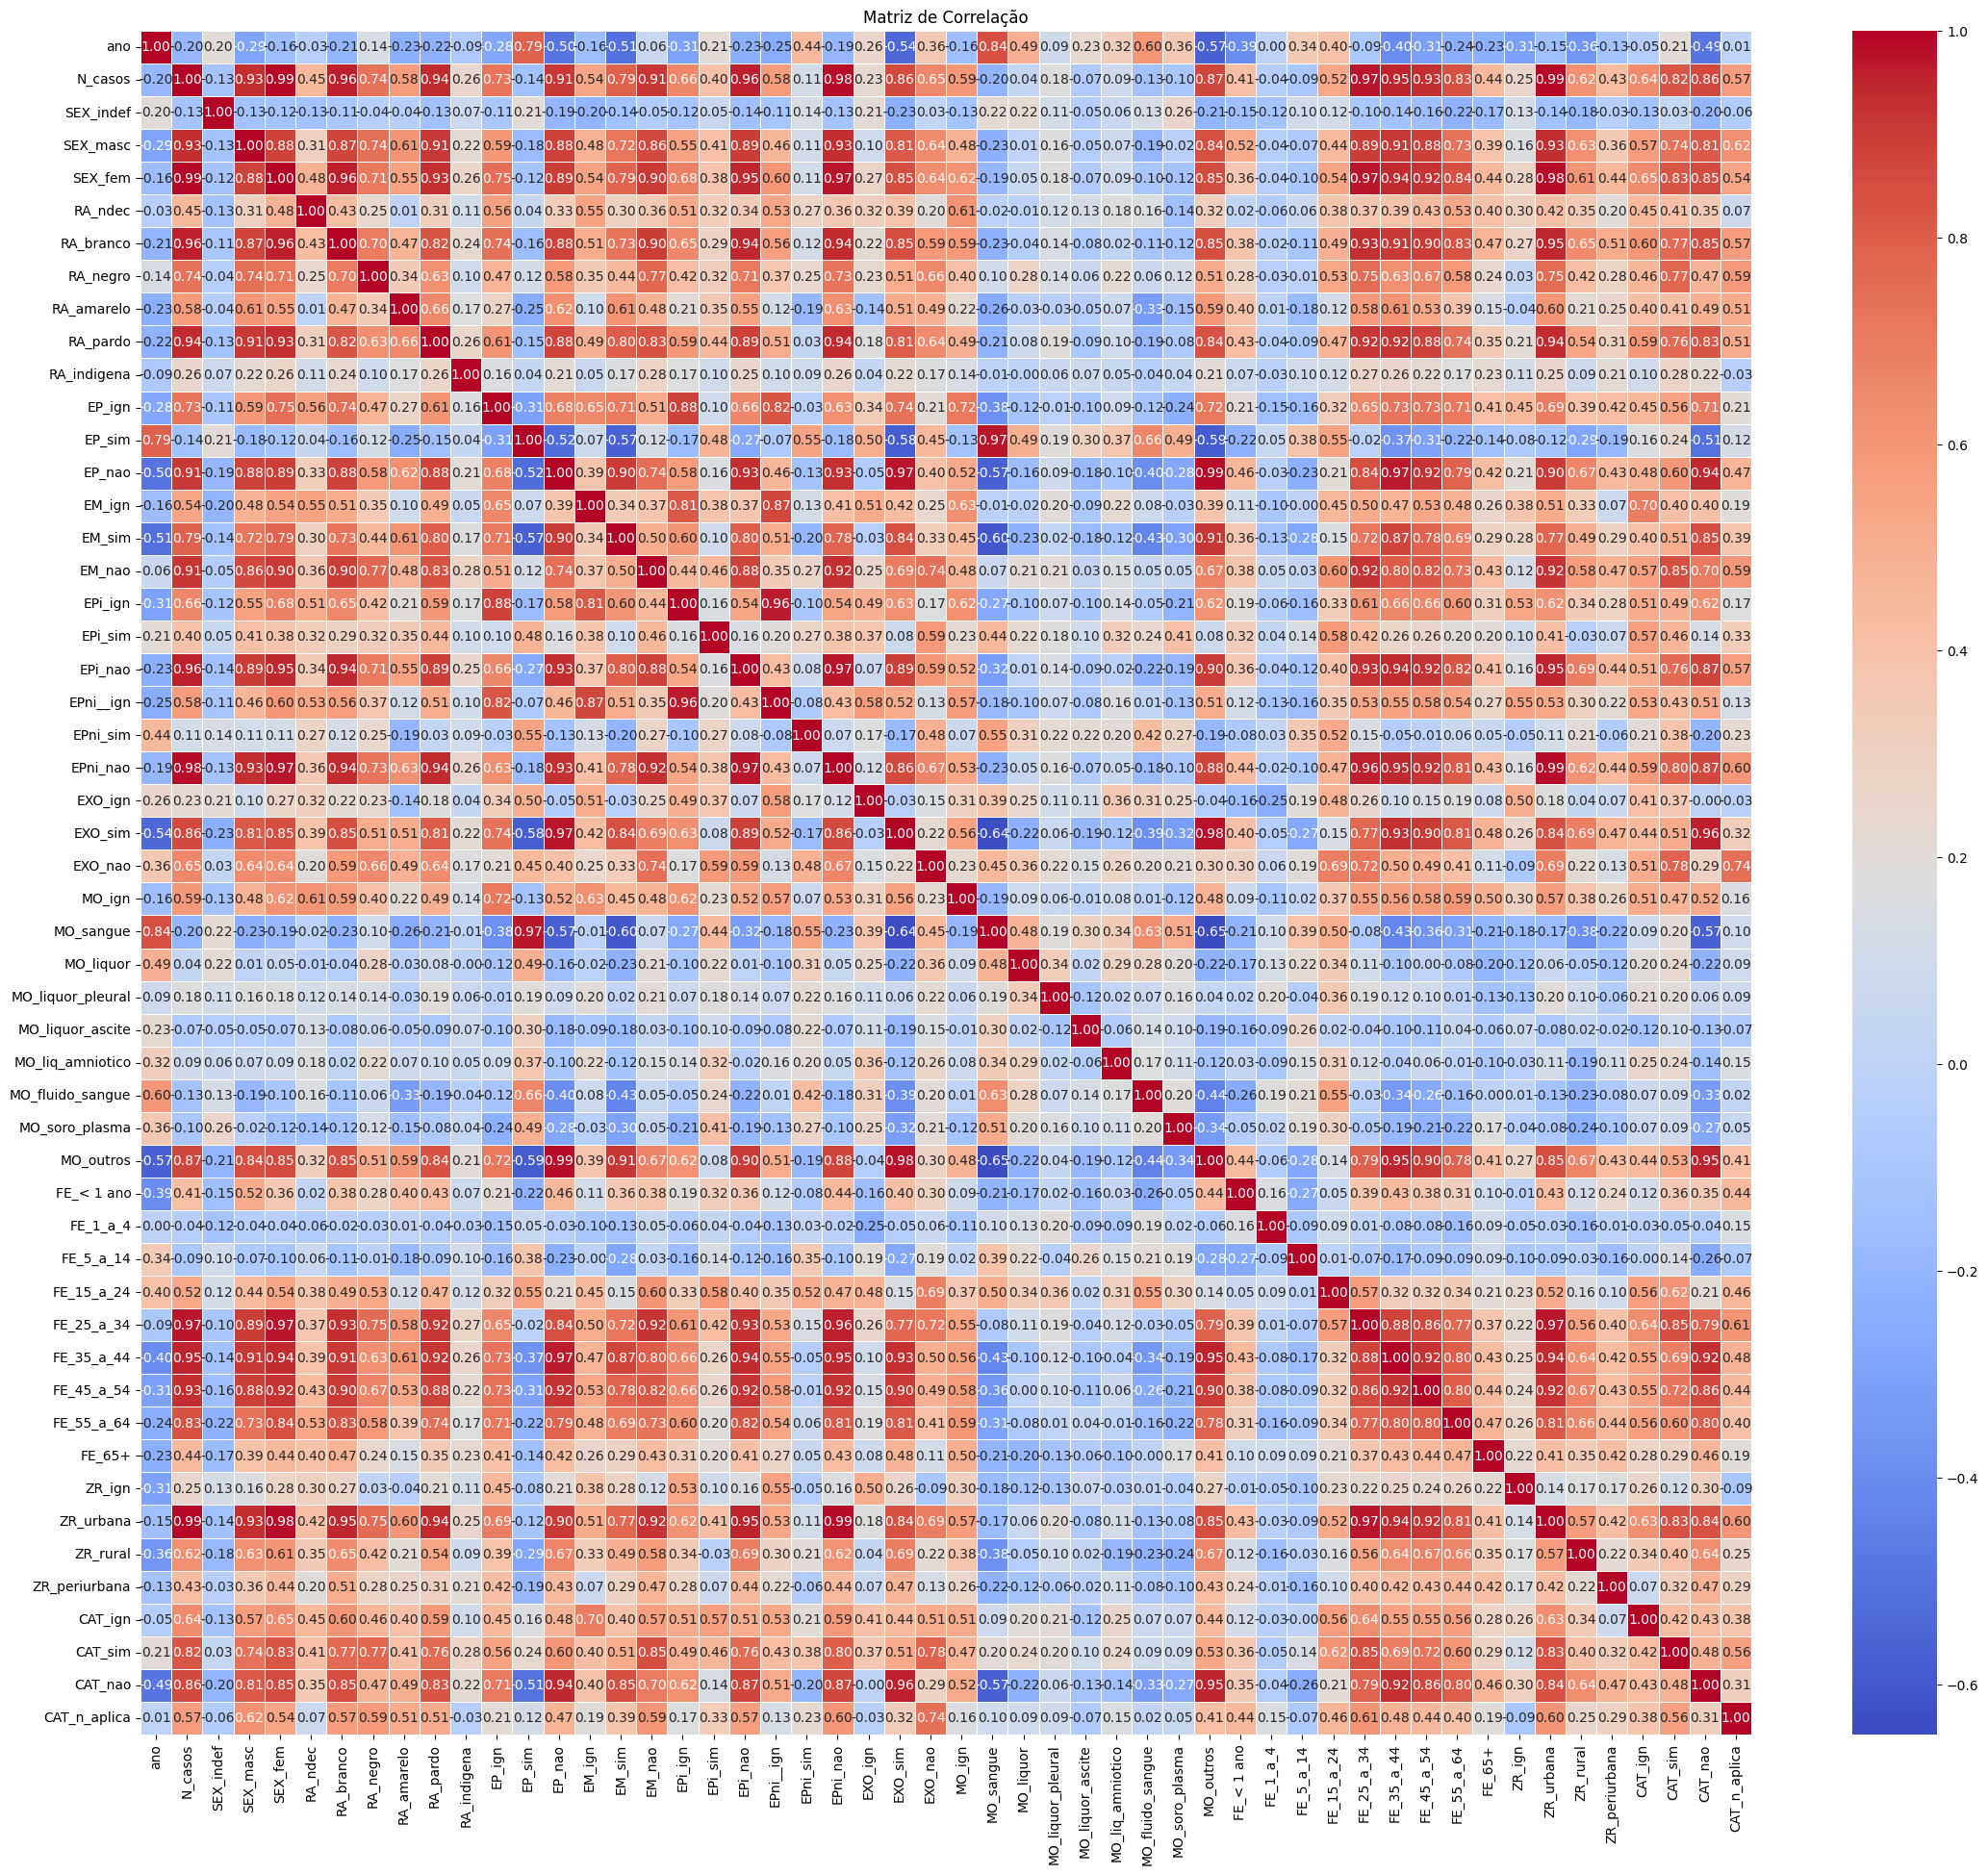

In [36]:
# --- 5. Matriz de correlação ---
# Criar matriz de correlação
corr = dados.corr(numeric_only=True)

# Plotar heatmap
plt.figure(figsize=(27,23))
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Matriz de Correlação")
plt.savefig("matriz_correlacao.jpg", dpi=600, bbox_inches="tight")
plt.show()